In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def bar_plot(df: pd.DataFrame, eixo_x: str, eixo_y: str, titulo: str) -> None:

    ax = sns.barplot(x=eixo_x, y=eixo_y, data=df, palette="Set3")

    # Add labels and title
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=10, color='black')

    plt.xticks(rotation=90)

    plt.title(titulo)

    # Show the plot
    plt.show()

In [3]:
df_pokemon = pd.read_csv('./pokemon.csv', sep=',').drop(columns=['Total', '#'])
df_pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


### Perguntas e Tarefas:

0. Explore os atributos do dataset e procure por valores nulos e duplicados;
1. Qual o tipo de pokémon mais presente no dataset? (considere as duas colunas para isso);
2. Exiba em um gráfico a quantidade de pokémons por tipo (considere as duas colunas para isso);
3. Liste os 10 pokémons mais poderosos a partir de uma medida de agregação;
4. Liste os pokemóns mais poderosos por tipo (considere as duas colunas para isso);
5. Os pokémons lendários são, em média, mais fortes ou mais fracos que os pokémons normais?
6. Liste, por categoria, a média das habilidades dos pokémons;

In [4]:
# Resposta da Pergunta 0:
  # A coluna 'Type 2' possui valores nulos;
  # Não há linhas duplicadas.

df_pokemon.info()
print(f"Linhas duplicadas: {df_pokemon.duplicated().sum()}")

df_pokemon = df_pokemon[~df_pokemon.duplicated()]

print(f"Linhas duplicadas: {df_pokemon.duplicated().sum()}")

df_pokemon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB
Linhas duplicadas: 0
Linhas duplicadas: 0


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


Total de colunas 'Type 1' e 'Type 2' com valores duplicados: 0


C:\Users\rondi\AppData\Local\Temp\ipykernel_4556\2116986508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=eixo_x, y=eixo_y, data=df, palette="Set3")


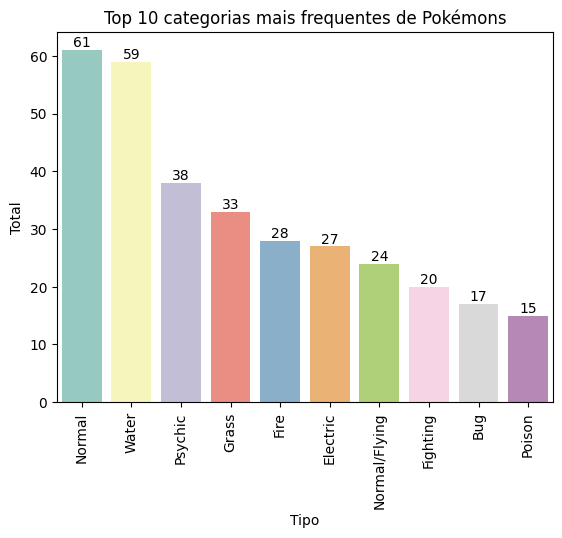

In [5]:
# Pergunta 1- Qual o tipo de pokémon mais presente no dataset? (considere as duas colunas para isso);

# verificar se há valroes duplicados nas colunas 'Type 1 e Type 2'
print(f"Total de colunas 'Type 1' e 'Type 2' com valores duplicados: {len(df_pokemon[df_pokemon['Type 1'] == df_pokemon['Type 2']])}")

# criar uma nova coluna 'Type' a partir da unificação de 'Type 1' e 'Type 2'.
df_pokemon['Type 2'] = df_pokemon['Type 2'].fillna('')

# Removendo '/' que sobra nos tipos quando o pokemon possui apenas o 'Type 1'.
df_pokemon['Type'] = np.where(df_pokemon['Type 2'] == '', df_pokemon['Type 1'],
                              df_pokemon['Type 1'] + '/' + df_pokemon['Type 2'])

# Remove as colunas 'Type 1', 'Type 2'.
df_pokemon = df_pokemon.drop(columns=['Type 1', 'Type 2'])

dfpc = df_pokemon["Type"].value_counts(ascending=False).reset_index().head(10)
dfpc = dfpc.rename(columns={"Type": "Tipo", "count": "Total"})

bar_plot(dfpc, dfpc.columns[0], dfpc.columns[1], 'Top 10 categorias mais frequentes de Pokémons')

C:\Users\rondi\AppData\Local\Temp\ipykernel_4556\2116986508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=eixo_x, y=eixo_y, data=df, palette="Set3")


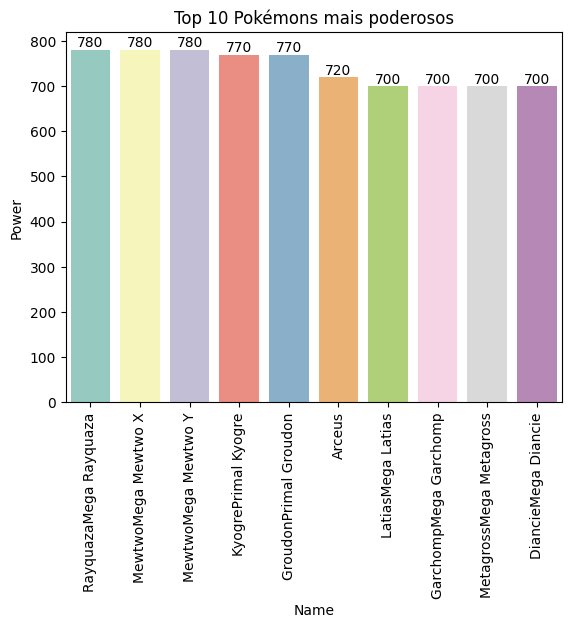

In [6]:
# Pergunta 3: Liste os 10 pokémons mais poderosos a partir de uma medida de agregação.

df_pokemon["Power"] = df_pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].sum(axis=1)
dfpp = df_pokemon[["Name", "Power"]].sort_values(by="Power", ascending=False).head(10)

bar_plot(dfpp, dfpp.columns[0], dfpp.columns[1], 'Top 10 Pokémons mais poderosos')


# EXERCÍCIO: TRANSFORMAR O GRÁFICO ABAIXO EM UM GRÁFICO DE BARRAS SECCIONADO, UTILIZANDO OS ATRIBUTOS SOMADOS.

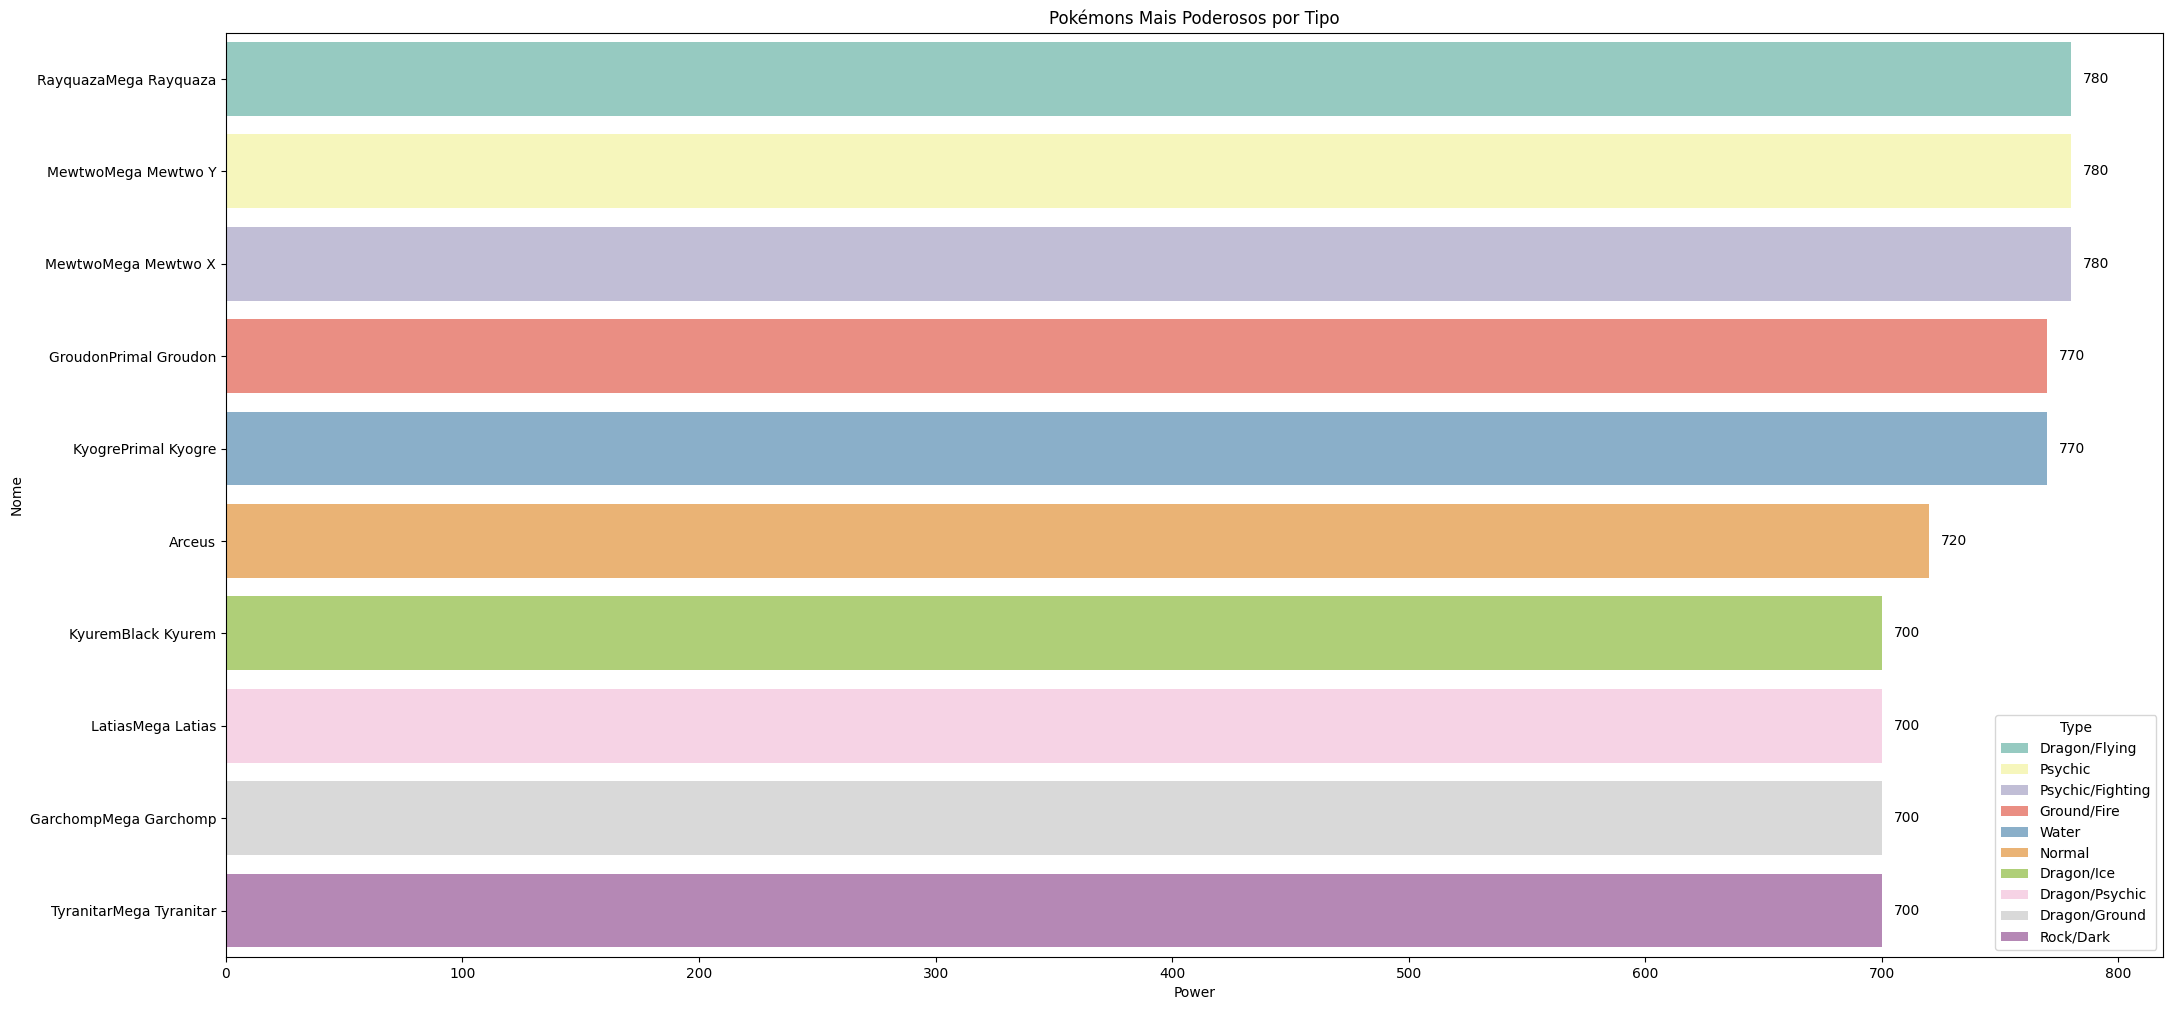

In [7]:
# Pergunta 5. Liste os pokemóns mais poderosos por tipo (considere as duas colunas para isso);

df_poder_categoria = df_pokemon.groupby(by='Type')[["Type", "Name", "Power"]].apply(lambda x: x.sort_values(by='Power', ascending=False).head(1)).reset_index(drop=True)
df_poder_categoria = df_poder_categoria.sort_values(by='Power', ascending=False).head(10)

plt.figure(figsize=(25, 12))
bar_plot_sns = sns.barplot(x='Power', y='Name', hue='Type', data=df_poder_categoria, dodge=False, palette="Set3")

# Adicionar os valores das barras
for index, value in enumerate(df_poder_categoria['Power']):
    plt.text(value + 5, index, str(value), color='black', va="center")

plt.title('Pokémons Mais Poderosos por Tipo')
plt.xlabel('Power')
plt.ylabel('Nome')
plt.show()

In [8]:

# 5. Os pokémons lendários são, em média, mais fortes ou mais fracos que os pokémons normais?
pokemon_lendario = df_pokemon[df_pokemon["Legendary"] == True]
pokemon_normal = df_pokemon[df_pokemon["Legendary"] == False]


poder_lendario = pokemon_lendario['Power'].mean()
poder_normal = pokemon_normal['Power'].mean()


print(f"Média de força dos pokemons Lendários:  {poder_lendario} \n")
print(f"Média de força dos pokemons Normais:  {poder_normal} \n")

poder_lendario > poder_normal


pokemon_lendario

#

### Perguntas e Tarefas:

# 0. Explore os atributos do dataset e procure por valores nulos e duplicados;
# 1. Qual o tipo de pokémon mais presente no dataset? (considere as duas colunas para isso);
# 2. Exiba em um gráfico a quantidade de pokémons por tipo (considere as duas colunas para isso);
# 3. Liste os 10 pokémons mais poderosos a partir de uma medida de agregação;
# 4. Liste os pokemóns mais poderosos por tipo (considere as duas colunas para isso);
# 5. Os pokémons lendários são, em média, mais fortes ou mais fracos que os pokémons normais?
# 6. Liste, por categoria, a média das habilidades dos pokémons;



Média de força dos pokemons Lendários:  637.3846153846154 

Média de força dos pokemons Normais:  417.21360544217686 



,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Power
156,Articuno,90,85,100,95,125,85,1,True,Ice/Flying,580
157,Zapdos,90,90,85,125,90,100,1,True,Electric/Flying,580
158,Moltres,90,100,90,125,85,90,1,True,Fire/Flying,580
162,Mewtwo,106,110,90,154,90,130,1,True,Psychic,680
163,MewtwoMega Mewtwo X,106,190,100,154,100,130,1,True,Psychic/Fighting,780
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,50,100,150,100,150,50,6,True,Rock/Fairy,600
796,DiancieMega Diancie,50,160,110,160,110,110,6,True,Rock/Fairy,700
797,HoopaHoopa Confined,80,110,60,150,130,70,6,True,Psychic/Ghost,600
798,HoopaHoopa Unbound,80,160,60,170,130,80,6,True,Psychic/Dark,680


                 Type          HP      Attack     Defense     Sp. Atk  \
81        Ground/Fire  100.000000  180.000000  160.000000  150.000000   
110      Psychic/Dark   80.000000  160.000000   60.000000  170.000000   
112  Psychic/Fighting   80.666667  160.000000   86.666667   94.666667   
2        Bug/Fighting   80.000000  155.000000   95.000000   40.000000   
22    Dragon/Electric  100.000000  150.000000  120.000000  120.000000   
119         Rock/Dark  100.000000  149.000000  130.000000   95.000000   
27         Dragon/Ice  125.000000  140.000000   93.333333  140.000000   
25      Dragon/Flying   94.333333  135.666667   97.500000  121.666667   
86       Ground/Steel  110.000000  135.000000   60.000000   50.000000   
95    Normal/Fighting   82.500000  132.000000   92.000000   65.500000   

        Sp. Def       Speed  
81    90.000000   90.000000  
110  130.000000   80.000000  
112  110.000000  106.666667  
2    100.000000   80.000000  
22   100.000000   90.000000  
119  110.000000 

<Figure size 1200x800 with 0 Axes>

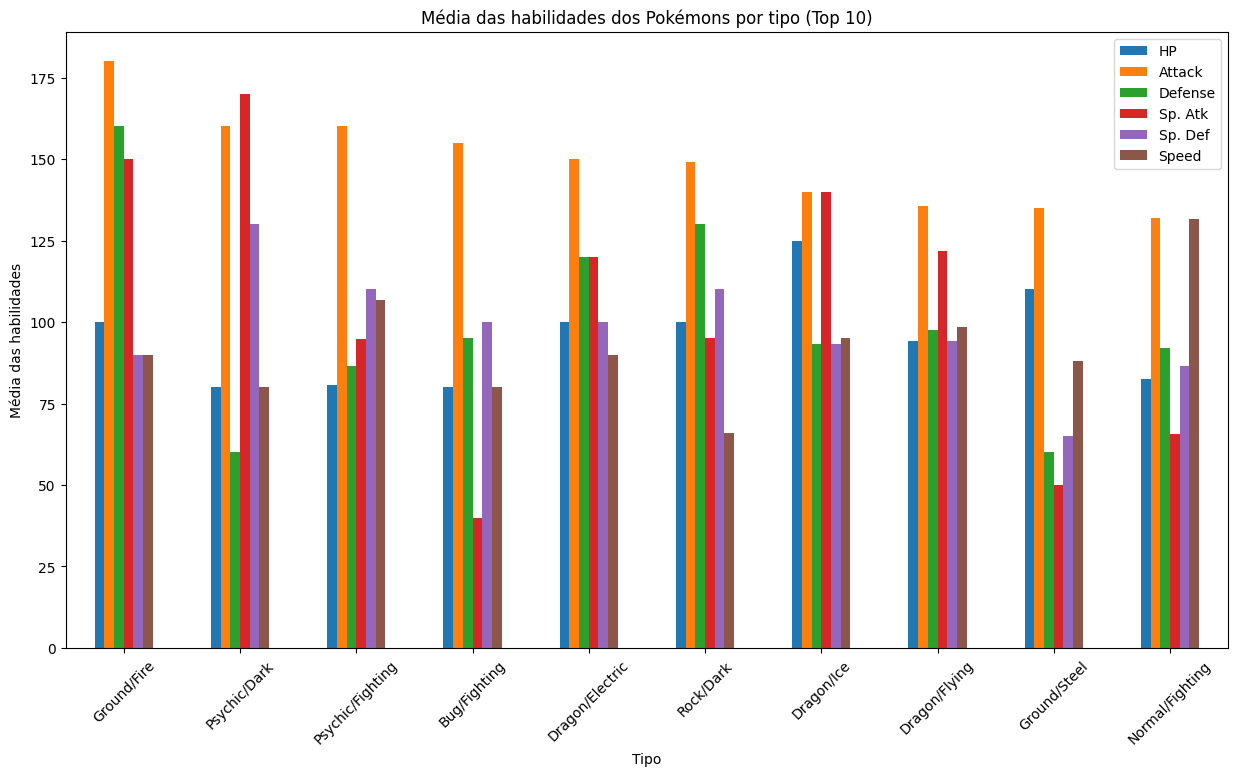

In [9]:
# Selecionar as colunas de habilidades
habilidades = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Calcular a média das habilidades por tipo
media_habilidades_por_tipo = df_pokemon.groupby('Type')[habilidades].mean().reset_index()

# Selecionar as 10 categorias principais (aqui estou ordenando pela média de 'Attack', mas pode ser alterado conforme necessário)
top_10_tipos = media_habilidades_por_tipo.sort_values(by='Attack', ascending=False).head(10)

# Exibir as médias calculadas para as 10 categorias principais
print(top_10_tipos)

# Opcional: Exibir os resultados em um gráfico de barras para cada habilidade
plt.figure(figsize=(12, 8))
top_10_tipos.set_index('Type').plot(kind='bar', figsize=(15, 8))
plt.title('Média das habilidades dos Pokémons por tipo (Top 10)')
plt.ylabel('Média das habilidades')
plt.xlabel('Tipo')
plt.xticks(rotation=45)
plt.show()


C:\Users\rondi\AppData\Local\Temp\ipykernel_4556\1044757205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Legendary', y='Power', data=avg_power, palette='Set2')


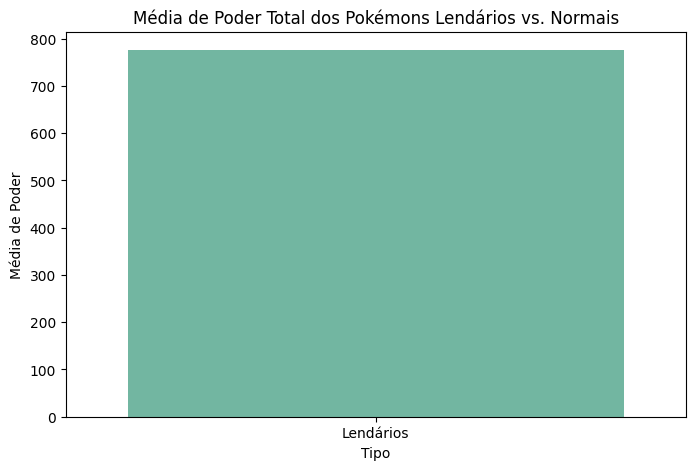

C:\Users\rondi\AppData\Local\Temp\ipykernel_4556\1044757205.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Legendary', y='Power', data=df_pokemon, palette='Set2')


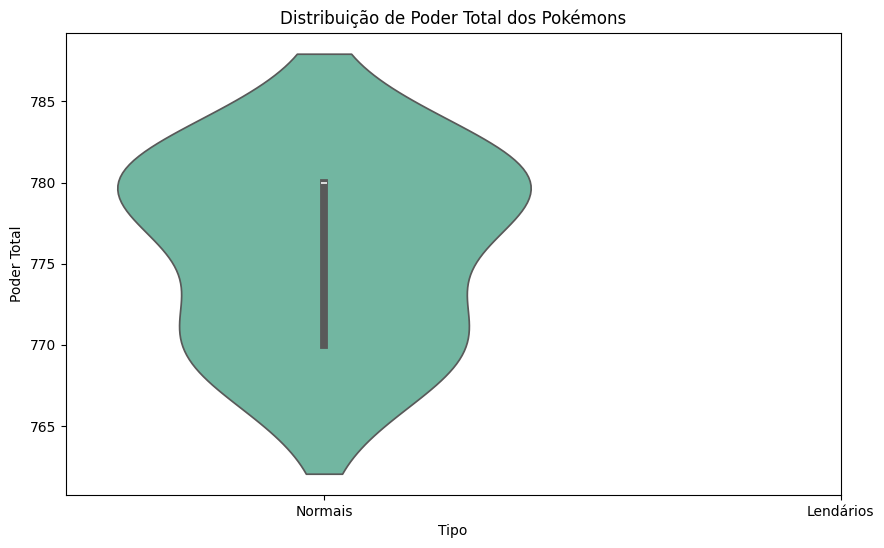

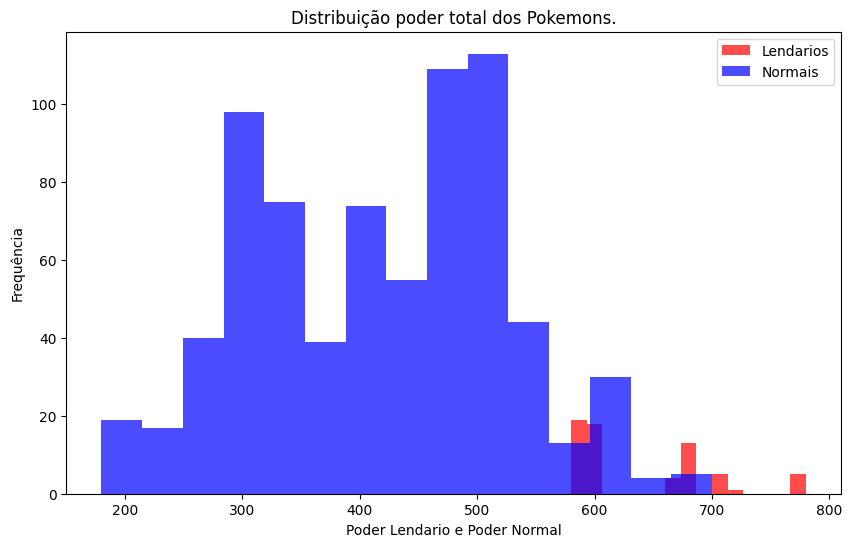

In [59]:
# Calcular a média de força para cada grupo
avg_power = df_pokemon.groupby('Legendary')['Power'].mean().reset_index()
avg_power['Legendary'] = avg_power['Legendary'].map({True: 'Lendários', False: 'Normais'})

# Plotar o gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x='Legendary', y='Power', data=avg_power, palette='Set2')
plt.title('Média de Poder Total dos Pokémons Lendários vs. Normais')
plt.xlabel('Tipo')
plt.ylabel('Média de Poder')
plt.show()

# Plotar o violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Legendary', y='Power', data=df_pokemon, palette='Set2')
plt.xticks([0, 1], ['Normais', 'Lendários'])
plt.title('Distribuição de Poder Total dos Pokémons')
plt.xlabel('Tipo')
plt.ylabel('Poder Total')
plt.show()


# DONT USE THIS Graphic
plt.figure(figsize=(10, 6))

plt.hist(pokemon_lendario['Power'], bins=15, alpha=0.7, label="Lendarios", color='red'),
plt.hist(pokemon_normal['Power'], bins=15, alpha=0.7, label="Normais", color='blue')

# Adicionar títulos e rótulos.
plt.title("Distribuição poder total dos Pokemons.")
plt.xlabel("Poder Lendario e Poder Normal")
plt.ylabel("Frequência")
plt.legend()
# mostrando o gráfico
plt.show()


# # Esse gráfico não funciona pois, o histograma serve para outro tipo de compraração gráfica.



In [58]:
# 6. Liste, por categoria, a média das habilidades dos pokémons;


pokemons = df_pokemon.duplicated()
print(df_pokemon)

print(pokemons)

if df_pokemon['type 1'] == 'flying' or df_pokemon['type 1'] == 'flying' and df_pokemon['type 1'] == 'dragon' or df_pokemon['type 2'] == 'flying':
    print(df_pokemon['type 1'], df_pokemon['type 2'])



df_poder_categoria = df_pokemon.groupby(by='Type')[["Type", "Name", "Power"]].apply(lambda x: x.sort_values(by='Power', ascending=False).head(1)).reset_index(drop=True)
df_poder_categoria = df_poder_categoria.sort_values(by='Power', ascending=False).head(10)

plt.figure(figsize=(25, 12))
bar_plot_sns = sns.barplot(x='Power', y='Name', hue='Type', data=df_poder_categoria, dodge=False, palette="Set3")

# Adicionar os valores das barras
for index, value in enumerate(df_pokemon['type 1']):
    plt.text(value + 5, index, str(value), color='black', va="center")

plt.title('Pokémons Mais Poderosos por Tipo')
plt.xlabel('Power')
plt.ylabel('Nome')
plt.show()

                      Name   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
164    MewtwoMega Mewtwo Y  106     150       70      194      120    140   
426  RayquazaMega Rayquaza  105     180      100      180      100    115   
163    MewtwoMega Mewtwo X  106     190      100      154      100    130   
422    KyogrePrimal Kyogre  100     150       90      180      160     90   
424  GroudonPrimal Groudon  100     180      160      150       90     90   

     Generation  Legendary              Type  Power  poder médio  
164  130.000000       True           Psychic    780   130.000000  
426  130.000000       True     Dragon/Flying    780   130.000000  
163  130.000000       True  Psychic/Fighting    780   130.000000  
422  128.333333       True             Water    770   128.333333  
424  128.333333       True       Ground/Fire    770   128.333333  
164    False
426    False
163    False
422    False
424    False
dtype: bool


KeyError: 'type 1'

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

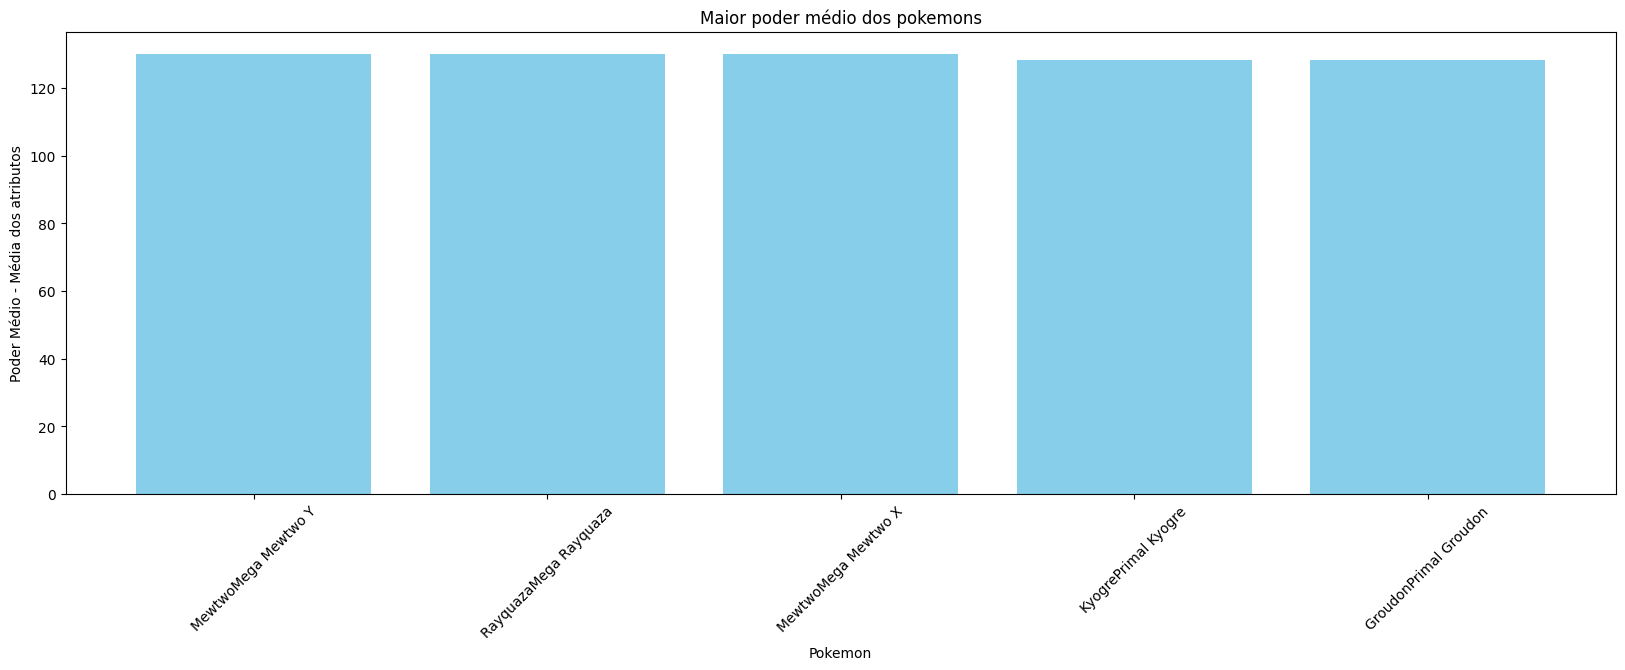

In [57]:
power_media = df_pokemon[["HP","Attack","Defense",'Sp. Atk',"Sp. Def","Speed"]].mean(axis=1)

df_pokemon = df_pokemon.sort_values('Generation', ascending=False).head(10)
# df_pokemon["Generation"] = power_media
plt.figure(figsize=(20, 6))
plt.bar(df_pokemon["Name"], df_pokemon["Generation"], color ="skyblue", )
plt.title("Maior poder médio dos pokemons")
plt.xlabel('Pokemon')
plt.ylabel('Poder Médio - Média dos atributos')
plt.xticks(rotation=45)
plt.tight_layout